<a href="https://colab.research.google.com/github/harshavardhangadila/Sample1/blob/main/Fractal_Clustering_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/My Drive/Bank_Loan_Approval_Predictor/Bank_Dataset.xlsx"
df = pd.read_excel(file_path)

In [ ]:
# Display basic info
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741,2231892,8 years,Own Home,Debt Consolidation,29200.53,14.9,29,18,1,297996,750090.0,0,0
1,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646,Short Term,730,1184194,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10,13,1,122170,272052.0,1,0
2,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746,Short Term,678,2559110,2 years,Rent,Debt Consolidation,18660.28,22.6,33,4,0,437171,555038.0,0,0
3,32c2e48f-1ba8-45e0-a530-9a6622c18d9c,0de7bcdb-ebf4-4608-ba39-05f083f855b6,Fully Paid,99999999,Short Term,728,714628,3 years,Rent,Debt Consolidation,11851.06,16.0,76,16,0,203965,289784.0,0,0
4,403d7235-0284-4bb6-919a-09402fecbf7b,11581f68-de3c-49d8-80d9-22268ebb323b,Fully Paid,99999999,Short Term,740,776188,< 1 year,Own Home,Debt Consolidation,11578.22,8.5,25,6,0,134083,220220.0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36424 entries, 0 to 36423
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       36424 non-null  object 
 1   Customer ID                   36424 non-null  object 
 2   Loan Status                   36424 non-null  object 
 3   Current Loan Amount           36424 non-null  int64  
 4   Term                          36424 non-null  object 
 5   Credit Score                  36424 non-null  int64  
 6   Annual Income                 36424 non-null  int64  
 7   Years in current job          36424 non-null  object 
 8   Home Ownership                36424 non-null  object 
 9   Purpose                       36424 non-null  object 
 10  Monthly Debt                  36424 non-null  float64
 11  Years of Credit History       36424 non-null  float64
 12  Months since last delinquent  36424 non-null  int64  
 13  N

In [ ]:
# Selecting relevant numerical columns for clustering
numeric_cols = [
    "Current Loan Amount", "Credit Score", "Annual Income", "Monthly Debt",
    "Years of Credit History", "Number of Open Accounts", "Number of Credit Problems",
    "Current Credit Balance", "Maximum Open Credit", "Bankruptcies", "Tax Liens"
]


In [ ]:
# Drop rows with missing values in selected numeric columns
df_cleaned = df[numeric_cols].dropna()

In [ ]:
# Standardizing the data for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned)

In [ ]:
# Iteration 1: Initial K-Means Clustering (4 Clusters)
kmeans_1 = KMeans(n_clusters=4, random_state=42, n_init=10)
df_cleaned["Cluster_1"] = kmeans_1.fit_predict(X_scaled)
sse_1 = kmeans_1.inertia_
silhouette_1 = silhouette_score(X_scaled, df_cleaned["Cluster_1"])

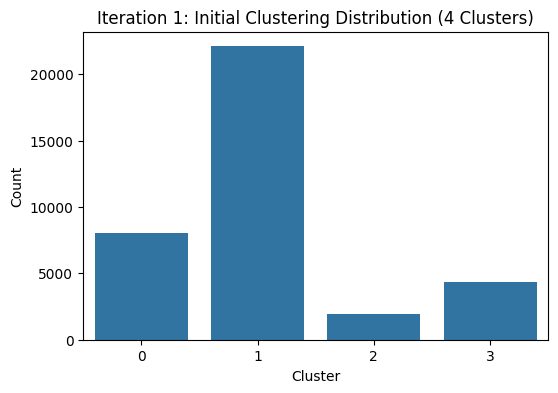

In [ ]:
# Visualizing Cluster Distribution (Iteration 1)
plt.figure(figsize=(6, 4))
sns.countplot(x=df_cleaned["Cluster_1"])
plt.title("Iteration 1: Initial Clustering Distribution (4 Clusters)")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

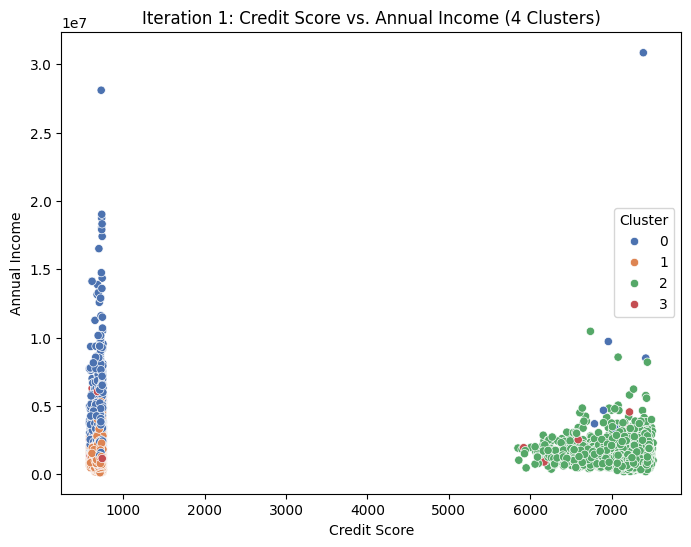

In [ ]:
# Scatter plot of Credit Score vs. Annual Income (Iteration 1)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cleaned["Credit Score"], y=df_cleaned["Annual Income"], hue=df_cleaned["Cluster_1"], palette="deep")
plt.title("Iteration 1: Credit Score vs. Annual Income (4 Clusters)")
plt.xlabel("Credit Score")
plt.ylabel("Annual Income")
plt.legend(title="Cluster")
plt.show()

In [ ]:
# Display Model Evaluation Results
print("\n### Model Evaluation: K-Means Iterations ###\n")
print("Iteration 1 (Initial Clustering - 4 Clusters):")
print(f"  - Sum of Squared Errors (SSE): {sse_1:.2f}")
print(f"  - Silhouette Score: {silhouette_1:.4f}\n")


### Model Evaluation: K-Means Iterations ###

Iteration 1 (Initial Clustering - 4 Clusters):
  - Sum of Squared Errors (SSE): 272587.11
  - Silhouette Score: 0.2914



In [ ]:
# Iteration 2: Refining High Variance Cluster
cluster_variances = df_cleaned.groupby("Cluster_1").var()
high_variance_cluster = cluster_variances["Credit Score"].idxmax()
sub_df = df_cleaned[df_cleaned["Cluster_1"] == high_variance_cluster].copy()

X_sub_scaled = scaler.fit_transform(sub_df[numeric_cols])
kmeans_2 = KMeans(n_clusters=3, random_state=42, n_init=10)
sub_df["Cluster_2"] = kmeans_2.fit_predict(X_sub_scaled)
sse_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(X_sub_scaled, sub_df["Cluster_2"])

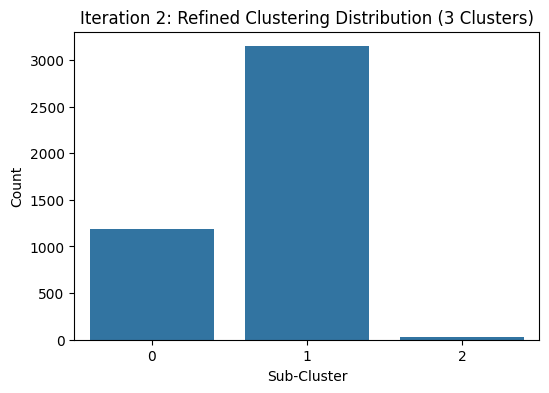

In [ ]:
# Visualizing Cluster Distribution (Iteration 2)
plt.figure(figsize=(6, 4))
sns.countplot(x=sub_df["Cluster_2"])
plt.title("Iteration 2: Refined Clustering Distribution (3 Clusters)")
plt.xlabel("Sub-Cluster")
plt.ylabel("Count")
plt.show()

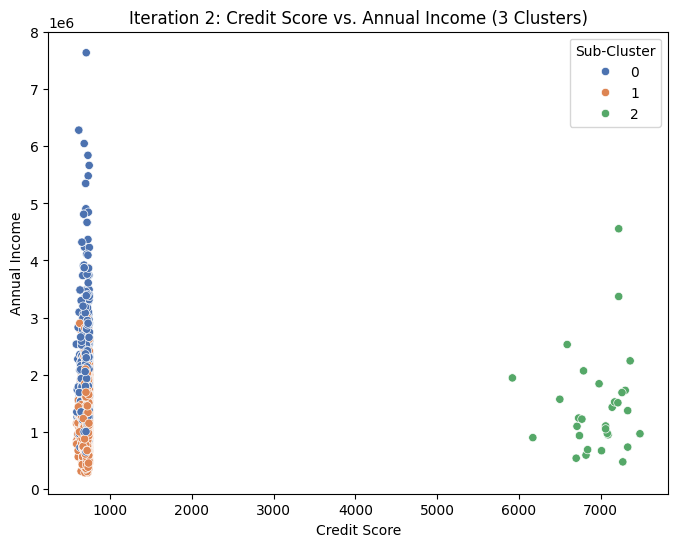

In [ ]:
# Scatter plot of Credit Score vs. Annual Income (Iteration 2)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=sub_df["Credit Score"], y=sub_df["Annual Income"], hue=sub_df["Cluster_2"], palette="deep")
plt.title("Iteration 2: Credit Score vs. Annual Income (3 Clusters)")
plt.xlabel("Credit Score")
plt.ylabel("Annual Income")
plt.legend(title="Sub-Cluster")
plt.show()

In [ ]:
print("Iteration 2 (Refining High Variance Cluster - 3 Clusters):")
print(f"  - Sum of Squared Errors (SSE): {sse_2:.2f}")
print(f"  - Silhouette Score: {silhouette_2:.4f}\n")

Iteration 2 (Refining High Variance Cluster - 3 Clusters):
  - Sum of Squared Errors (SSE): 37658.82
  - Silhouette Score: 0.2492



In [ ]:
# Iteration 3: Further Refinement on High Variance Sub-Cluster
sub_cluster_variances = sub_df.groupby("Cluster_2").var()
high_variance_sub_cluster = sub_cluster_variances["Credit Score"].idxmax()
final_df = sub_df[sub_df["Cluster_2"] == high_variance_sub_cluster].copy()

X_final_scaled = scaler.fit_transform(final_df[numeric_cols])
kmeans_3 = KMeans(n_clusters=2, random_state=42, n_init=10)
final_df["Cluster_3"] = kmeans_3.fit_predict(X_final_scaled)
sse_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(X_final_scaled, final_df["Cluster_3"])

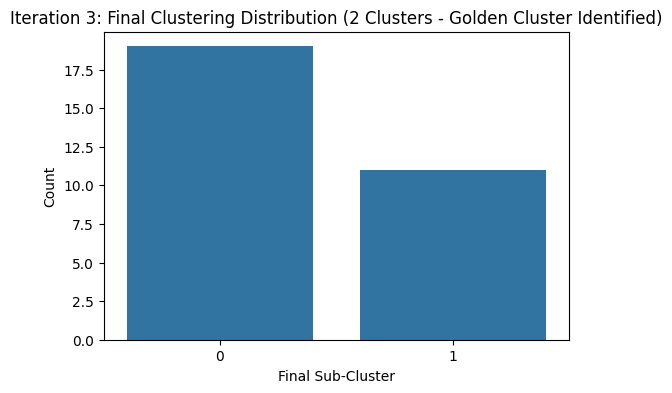

In [ ]:
# Visualizing Cluster Distribution (Iteration 3 - Final Clustering)
plt.figure(figsize=(6, 4))
sns.countplot(x=final_df["Cluster_3"])
plt.title("Iteration 3: Final Clustering Distribution (2 Clusters - Golden Cluster Identified)")
plt.xlabel("Final Sub-Cluster")
plt.ylabel("Count")
plt.show()

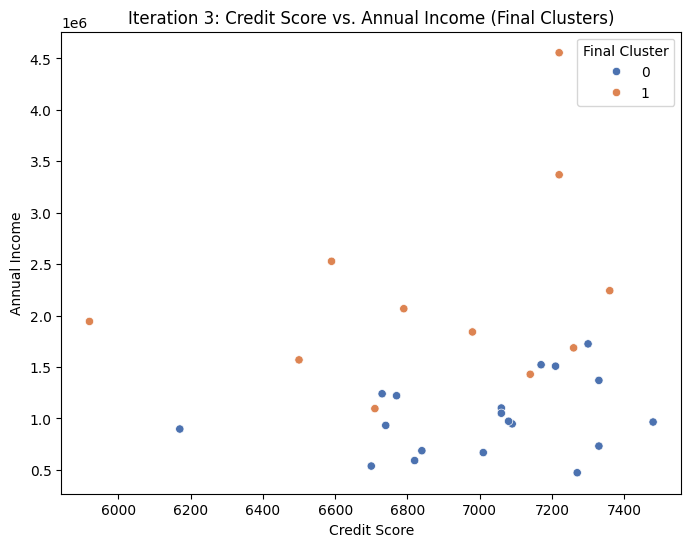

In [ ]:
# Scatter plot of Credit Score vs. Annual Income (Iteration 3 - Final Clustering)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=final_df["Credit Score"], y=final_df["Annual Income"], hue=final_df["Cluster_3"], palette="deep")
plt.title("Iteration 3: Credit Score vs. Annual Income (Final Clusters)")
plt.xlabel("Credit Score")
plt.ylabel("Annual Income")
plt.legend(title="Final Cluster")
plt.show()

In [ ]:
print("Iteration 3 (Final Clustering - 2 Clusters, Golden Cluster Identified):")
print(f"  - Sum of Squared Errors (SSE): {sse_3:.2f}")
print(f"  - Silhouette Score: {silhouette_3:.4f}\n")

Iteration 3 (Final Clustering - 2 Clusters, Golden Cluster Identified):
  - Sum of Squared Errors (SSE): 241.55
  - Silhouette Score: 0.2580



In [ ]:

# Golden Cluster Identification using Objective Functions
penalty_factor = 500
final_df["Creditworthiness_Score"] = (final_df["Credit Score"] + final_df["Annual Income"]) - (
    final_df["Monthly Debt"] + final_df["Number of Credit Problems"] * penalty_factor
)

final_df["Loan_Risk_Score"] = (final_df["Monthly Debt"] + final_df["Number of Credit Problems"] * penalty_factor) - (
    final_df["Credit Score"] + final_df["Annual Income"]
)

golden_cluster_analysis = final_df.groupby("Cluster_3")[
    ["Creditworthiness_Score", "Loan_Risk_Score"]
].mean()


In [ ]:
print("Golden Cluster Detailed Analysis:")
print(golden_cluster_analysis)

Golden Cluster Detailed Analysis:
           Creditworthiness_Score  Loan_Risk_Score
Cluster_3                                         
0                    9.985158e+05    -9.985158e+05
1                    2.193709e+06    -2.193709e+06


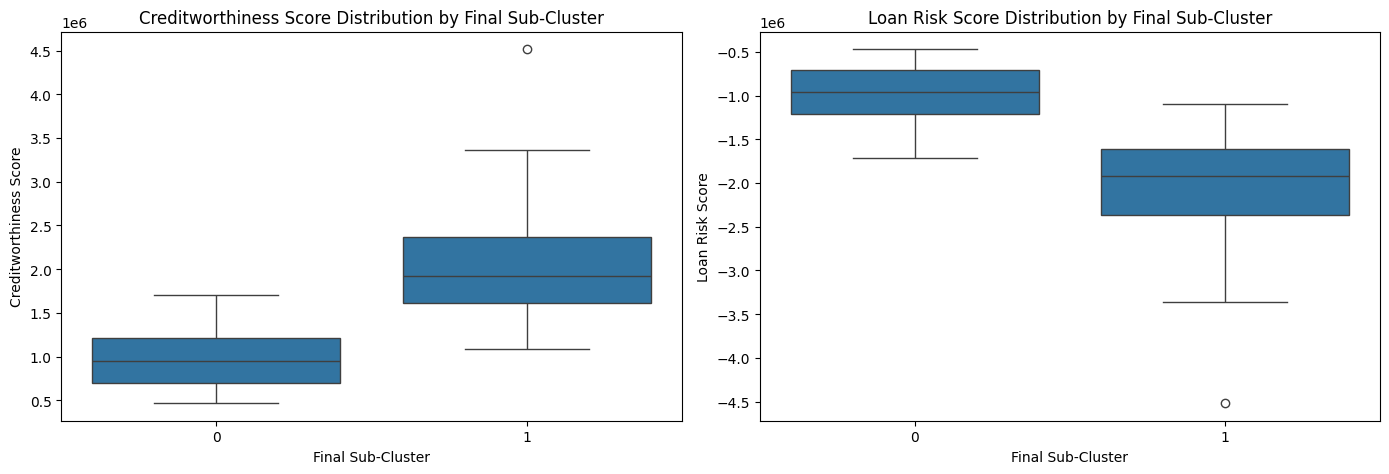

In [ ]:
# Boxplots for Creditworthiness & Loan Risk Score (Final Clusters)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(x=final_df["Cluster_3"], y=final_df["Creditworthiness_Score"], ax=axes[0])
axes[0].set_title("Creditworthiness Score Distribution by Final Sub-Cluster")
axes[0].set_xlabel("Final Sub-Cluster")
axes[0].set_ylabel("Creditworthiness Score")

sns.boxplot(x=final_df["Cluster_3"], y=final_df["Loan_Risk_Score"], ax=axes[1])
axes[1].set_title("Loan Risk Score Distribution by Final Sub-Cluster")
axes[1].set_xlabel("Final Sub-Cluster")
axes[1].set_ylabel("Loan Risk Score")

plt.tight_layout()
plt.show()

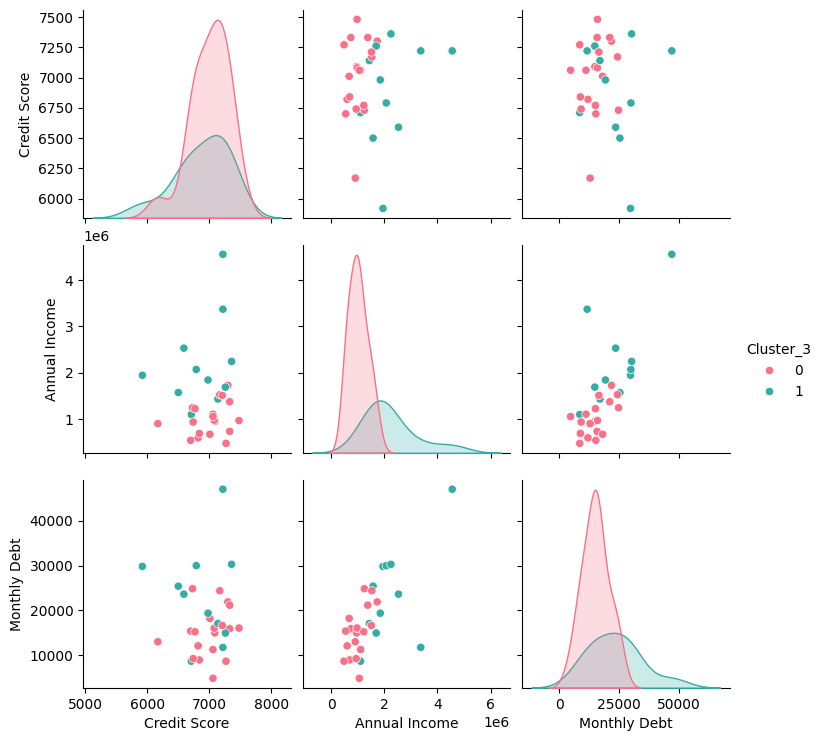

In [ ]:
# Pairplot of key financial features (Final Clustering)
sns.pairplot(final_df, vars=["Credit Score", "Annual Income", "Monthly Debt"], hue="Cluster_3", palette="husl")
plt.show()
